<a href="https://colab.research.google.com/github/rishabhgupta592/HappinessPrediction/blob/main/HappinessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    
from pprint import pprint

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("hm_train.csv")
train_data

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection
...,...,...,...,...,...
60316,88299,3m,I got together with my best friend and baked c...,1,bonding
60317,88300,3m,I went to a restaurant with friends,1,bonding
60318,88301,3m,The other day on Mechanical Turk I made over f...,1,achievement
60319,88302,3m,Finished the semester today and aced majority ...,2,achievement


In [ ]:
train_data.isna().sum()

hmid                  0
reflection_period     0
cleaned_hm            0
num_sentence          0
predicted_category    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


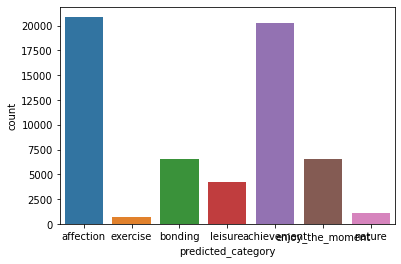

In [ ]:
sns.countplot(train_data['predicted_category'])

In [ ]:
train_data["predicted_category"].value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
def process(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))
    
    # remove all single characters
    #text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    processed_text = text.lower()
    # text_list = word_tokenize(processed_text)
    # stemmed_text
    # for word in text_list:
    #     word = ps.stem(word)
    # processed_text = " ".join(text_list)
    return processed_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
train_data['cleaned_hm_processed'] = train_data["cleaned_hm"].progress_apply(process)

In [ ]:
text = np.array(train_data['cleaned_hm_processed'])
category = np.array(train_data['predicted_category']) 
Train_X, Test_X, Train_Y, Test_Y = train_test_split(text, category, test_size=0.2, random_state=101)

In [ ]:
# build TFIDF features on train articles
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1),stop_words='english', max_features= 5000,
                     sublinear_tf=True)
# tv.fit(text)
from sklearn.feature_extraction.text import CountVectorizer

tv = CountVectorizer(min_df=0, lowercase=False)
tv.fit(text)
Train_X = tv.transform(Train_X)
Test_X  = tv.transform(Test_X)
Train_X

<48256x20507 sparse matrix of type '<class 'numpy.int64'>'
	with 719005 stored elements in Compressed Sparse Row format>

In [ ]:
print('TFIDF model:> Train features shape:', Train_X.shape)
print('TFIDF model:> Test features shape:', Test_X.shape)

TFIDF model:> Train features shape: (48256, 20507)
TFIDF model:> Test features shape: (12065, 20507)


In [ ]:
Train_Y

array(['leisure', 'bonding', 'bonding', ..., 'enjoy_the_moment',
       'leisure', 'achievement'], dtype=object)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
print('Train label shape:', Train_Y.shape)
print('Test label shape: ', Test_Y.shape)

Train label shape: (48256,)
Test label shape:  (12065,)


In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = Train_X.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(7, activation='Softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()


# 18756 feature size
# hidden layer node = 10 (given above in keras model)
# number of weights = 18756 * 10 = 187560
# 10 bias for each node. 
# total param = 187560 + 10 = 187570


# in final layer
# 10 weights and one bias = 11 params

# Total param = 187570 + 11 = 187581


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                205080    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
Total params: 205,157
Trainable params: 205,157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train_X_Tfidf = tf.sparse.reorder(
#     Train_X_Tfidf, name=None
# )

In [ ]:
>>> history = model.fit(Train_X, Train_Y,
...                     epochs=10,
...                     verbose=True,
...                     validation_data=(Test_X, Test_Y),
...                     batch_size=64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


754/754 [==============================] - 22s 8ms/step - loss: 1.2583 - accuracy: 0.5843 - val_loss: 0.4401 - val_accuracy: 0.8852
Epoch 2/10
754/754 [==============================] - 5s 7ms/step - loss: 0.3555 - accuracy: 0.9072 - val_loss: 0.2878 - val_accuracy: 0.9121
Epoch 3/10
754/754 [==============================] - 5s 7ms/step - loss: 0.1993 - accuracy: 0.9492 - val_loss: 0.2316 - val_accuracy: 0.9274
Epoch 4/10
754/754 [==============================] - 5s 7ms/step - loss: 0.1277 - accuracy: 0.9731 - val_loss: 0.2007 - val_accuracy: 0.9334
Epoch 5/10
754/754 [==============================] - 5s 7ms/step - loss: 0.0893 - accuracy: 0.9839 - val_loss: 0.1914 - val_accuracy: 0.9348
Epoch 6/10
754/754 [==============================] - 5s 7ms/step - loss: 0.0669 - accuracy: 0.9887 - val_loss: 0.1851 - val_accuracy: 0.9365
Epoch 7/10
754/754 [==============================] - 5s 7ms/step - loss: 0.0499 - accuracy: 0.9930 - val_loss: 0.1864 - val_accuracy: 0.9368
Epoch 8/10
754/7

In [ ]:
loss, accuracy = model.evaluate(Train_X, Train_Y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Test_X, Test_Y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9981
Testing Accuracy:  0.9357


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,auc,roc_auc_score,classification_report
y_score = model.predict_classes(Test_X)
print(y_score.shape)
print("*"*10)
# y_pred_test = clf.predict(tfidf_test_features)
print("Confusion matrix \n", metrics.confusion_matrix(Test_Y, y_score))
cr=classification_report(Test_Y,y_score)
print(cr)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(12065,)
**********
Confusion matrix 
 [[3809   70   17   85    9   45   10]
 [  55 4059   15   24    1    8    3]
 [  37   24 1294    9    0    4    2]
 [ 119   38   10 1050    1   32    9]
 [  10    7    2    2  132    3    2]
 [  39   10    2   41    2  764    3]
 [   7    8    0   10    0    1  181]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4045
           1       0.96      0.97      0.97      4165
           2       0.97      0.94      0.95      1370
           3       0.86      0.83      0.85      1259
           4       0.91      0.84      0.87       158
           5       0.89      0.89      0.89       861
           6       0.86      0.87      0.87       207

    accuracy                           0.94     12065
   macro avg       0.91      0.90      0.91     12065
weighted avg       0.94      0.94      0.94     12065



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

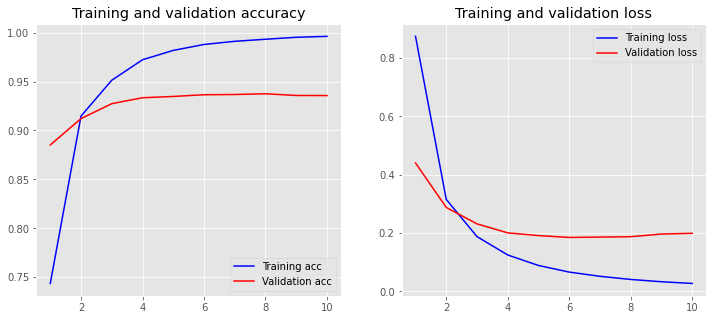

In [ ]:
plot_history(history)

In [ ]:
def get_prediction(sent):
    sent = process(sent)
    test_vec = tv.transform([sent])
    # SVM.predict(test_vec)

    class_value = model.predict_classes(test_vec)
    # prob = clf.predict_proba(test_vec)[0][class_value[0]]
#     print("Calss_value = ", class_value)
#     print("Predicted Class = ", Encoder.inverse_transform(class_value)[0])
#     print("Probabilty  = ", prob)
    return Encoder.inverse_transform(class_value)[0]

In [ ]:
s= "I went to the gym this morning and did yoga"
get_prediction(s)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'exercise'

In [ ]:
# on test set now.
#h_test_data = pd.read_csv("hm_test.csv")
#h_test_data
# h_test_data['cleaned_hm_processed'] = h_test_data["cleaned_hm"].progress_apply(process)
# h_test_data['Outputlabel']= h_test_data["cleaned_hm_processed"].progress_apply(get_prediction)
# final_data = h_test_data.drop(["reflection_period", "cleaned_hm", "num_sentence", "cleaned_hm_processed" ], axis=1)
# final_data = final_data.rename(columns={"Outputlabel": "predicted_category"})
# final_data.to_csv("submisson_2.csv", index=False)

In [ ]:
# CNN implementation

In [ ]:
from keras.backend import clear_session
clear_session()


In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50 # Of your own choosing
model = Sequential()
model.add(layers.Embedding(input_dim=Train_X.shape[1], output_dim=300, input_length=100))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, ))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          6152100   
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                300010    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 6,452,121
Trainable params: 6,452,121
Non-trainable params: 0
_________________________________________________________________
